# This script uses the csv for analysis and figure generation

In [1]:
import numpy as np
import pandas as pd
import csv
import string
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import filecmp
from scipy import stats
import re

In [2]:
#### POST-PROCESSING ###################
def pivot_pos_aa(master):
#Generate table of positions of amino acids.  
#In this table, contain the number of summed number of reads with that amino acid at that position
    position_n = ['0','1','2','3','4','5','6','7','8']
    index_x = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    
    # Weighted by read counts
    pivot = pd.DataFrame(columns=position_n, index=index_x)
    for i in position_n:
        for j in index_x:
            pivot[i][j]=np.sum((master[int(i)]==j)*master['count']) 
                #Explanation: (master[int(i)]==j) is 0's except where master has amino acid j at position i (then it is a 1)
    return pivot



def heatmaps_discrete(pivot_norm, roundx, title, cbar_label, labels, bins, xlabel='', ylabel=''):
#normalized data (input) shown with DISCRETE colorbar
    #Generate discrete dataframe
    position_n = list(pivot_norm.columns.values)
    index_x = list(pivot_norm.index.values)
    n_bins = np.size(bins)-1
    bin_color =  list(range(0, n_bins+1))
    pivot_discrete = pd.DataFrame(columns=position_n, index=index_x)

    for x in range(1,n_bins+1):
        for i in position_n:
            for j in index_x:
                if pivot_norm[i][j]<=bins[x] and pivot_norm[i][j]>bins[x-1]:
                    pivot_discrete[i][j] = 0.5*(bin_color[x]+bin_color[x-1]) #this puts the value in the middle of a bin

    plt.figure(figsize=(12,15)) #adjust size of figure
    ax=sns.heatmap(pivot_discrete.astype(float),cbar_kws={'label': cbar_label},vmin=0,vmax=n_bins,cmap=plt.cm.get_cmap('Blues', n_bins))#, square=True)
    
    font_size = 35
    ax.set_xticklabels(labels,fontsize=font_size)
    ax.set_title(roundx+': '+title+'\n',y=1.08,fontsize=font_size)
    
    
    #test:
    ax.set_yticklabels(['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],horizontalalignment='center', fontsize=font_size)
    ax.tick_params(axis='both', pad=25,length=0)
    
    ax.figure.axes[-1].yaxis.label.set_size(font_size) #colorbar label
    
    
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(bin_color)
    colorbar.set_ticklabels(bins)
    colorbar.ax.tick_params(labelsize=font_size) #fontsize for colorbar numbers
    plt.yticks(rotation=0) #makes text not rotated
    plt.xlabel(xlabel)
    #plt.ylabel(ylabel,horizontalalignment='left',fontsize='x-large')
    plt.ylabel(ylabel)
    #plt.savefig(roundx+'_'+title_save+'_norm_discrete.png')
    plt.show()
    
      
        
def call_heatmaps(pivot, roundx, title, cbar_label): #saves options for heatmaps of position vs aa
#Generates both continous and discrete heatmaps
    bins = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1] #bins for discrete colorbar
    labels = ['1','2','3','4','5','6','7','8','9']
    pivot_norm = pivot/pivot.sum(0)[0]
    heatmaps_discrete(pivot_norm, roundx, title, cbar_label, labels, bins)

        

    
## Call other functions ###############
def do_it(file_name, roundx):
    master_nostop = pd.read_csv(file_name+'.csv')
    master_nostop = master_nostop[~master_nostop['sequence'].str.contains('*',regex=False)] #remove stop codons
    for i in range(0,9):
        master_nostop[i]=master_nostop['sequence'].str[i]
   
    #make column headers to numbers not strings:
    #master_nostop.rename(columns={'0':0, '1':1, '2':2, '3':3, '4':4,'5':5,'6':6,'7':7,'8':8}, inplace=True)

    pivot = pivot_pos_aa(master_nostop)
    
    #Generate heatmaps for weighted by read counts
    call_heatmaps(pivot, 
             roundx,
             title='Peptides Weighted by Read Count',
             cbar_label='Fraction of Reads')#'Proportion of Reads')
    
    return pivot

Analyzing round A3


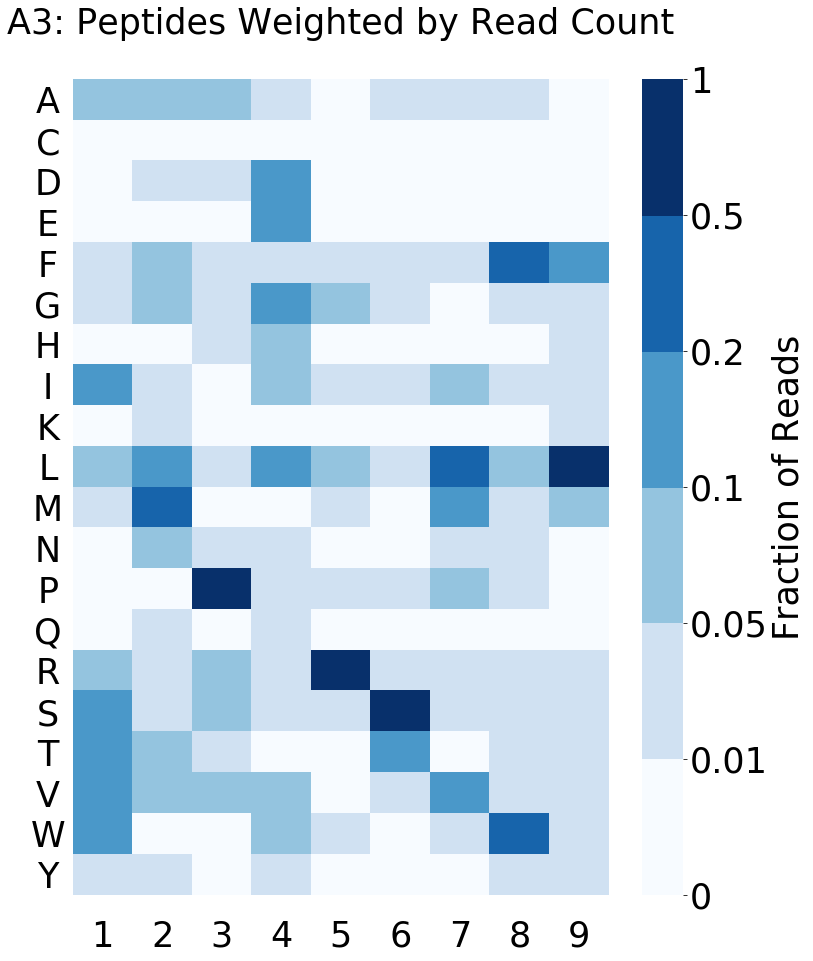

Analyzing round C3


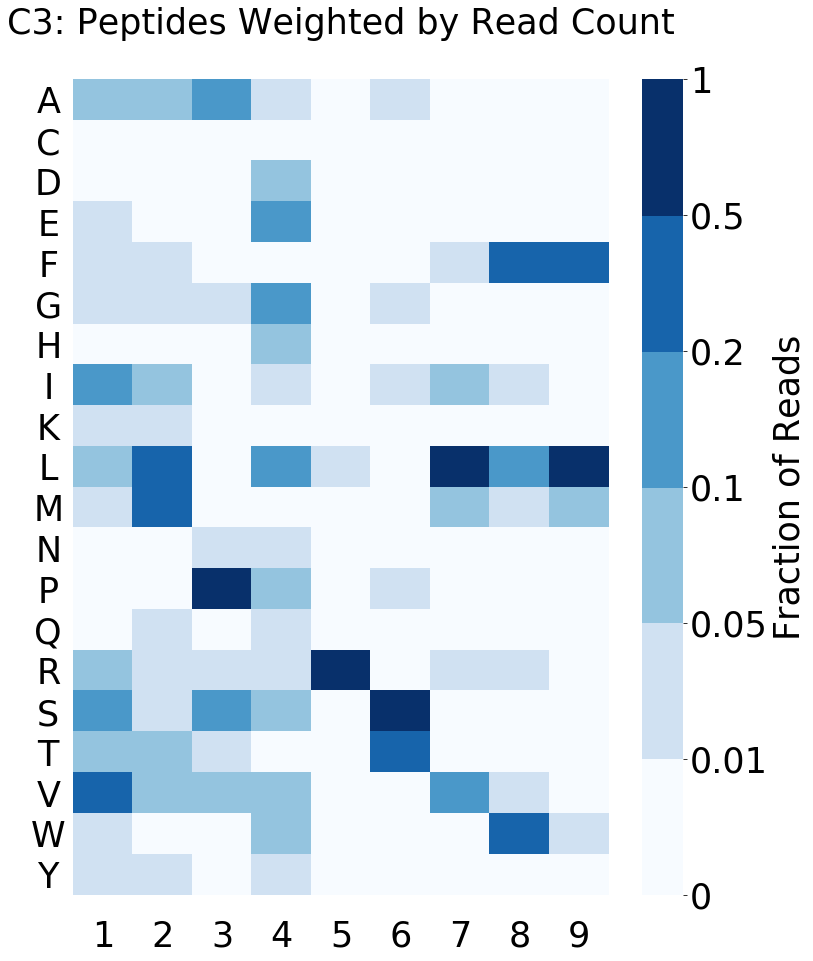

Analyzing round R0


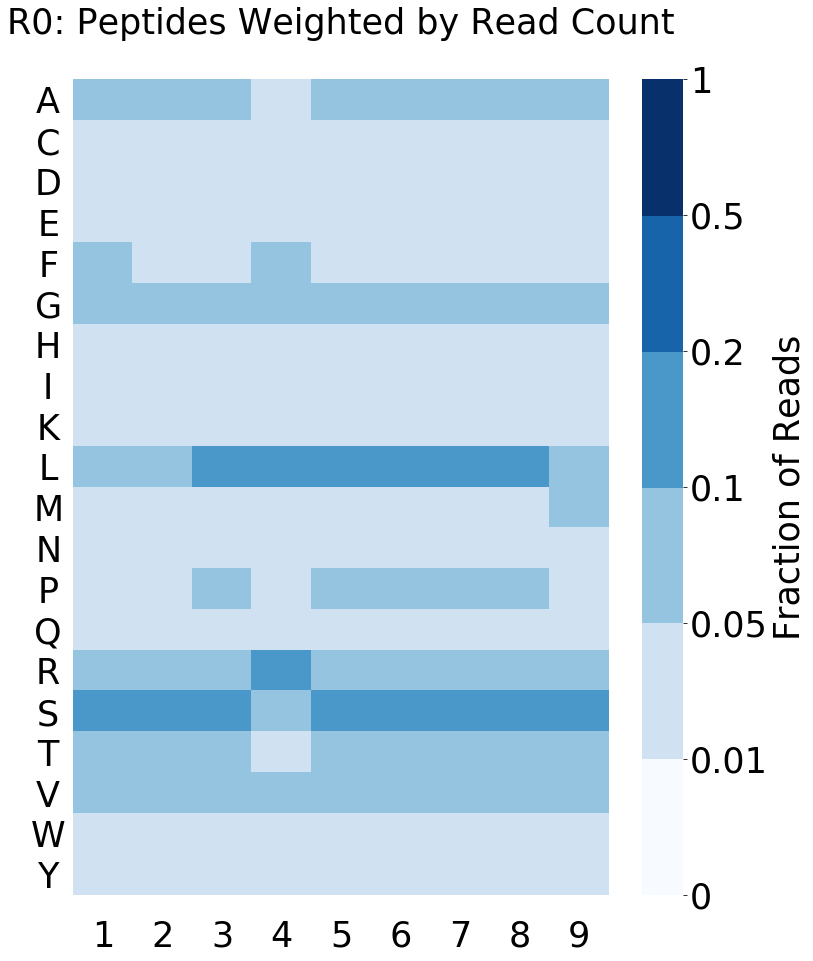

Analyzing round A2


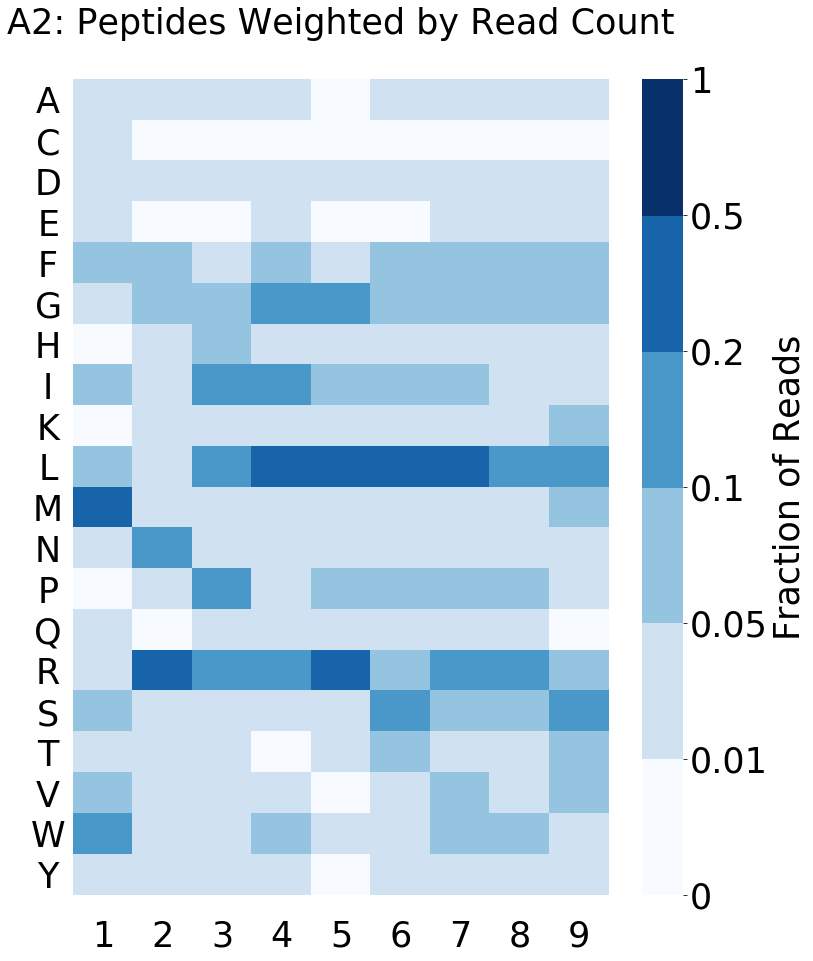

Analyzing round C2


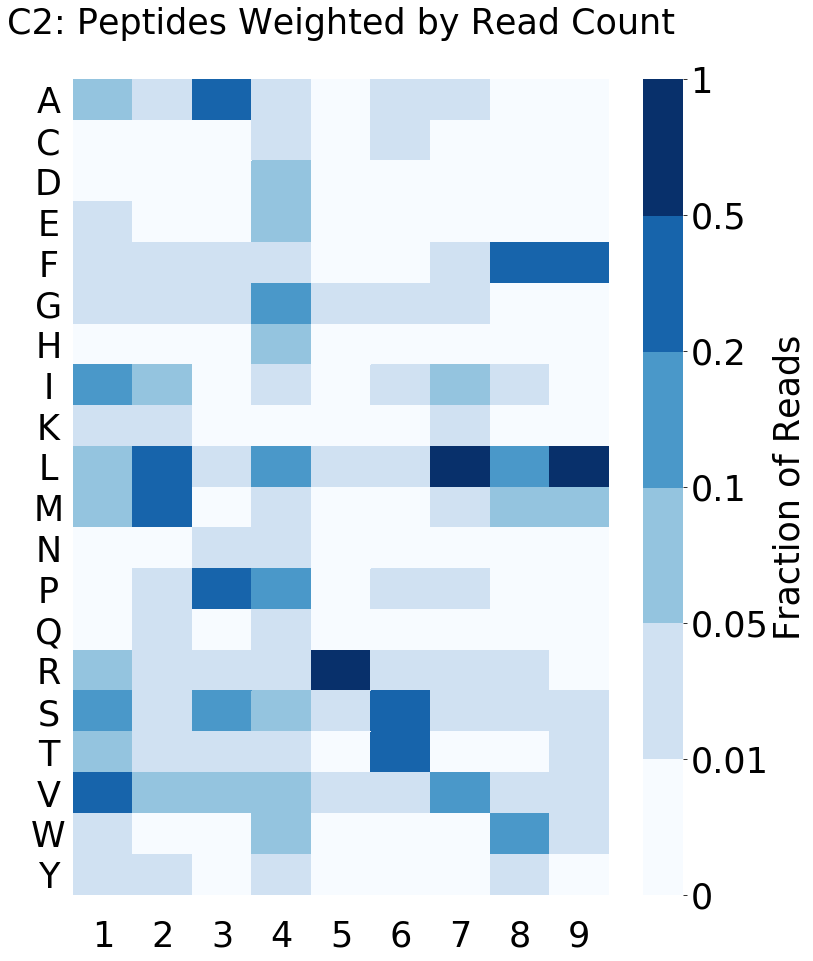

Analyzing round A1


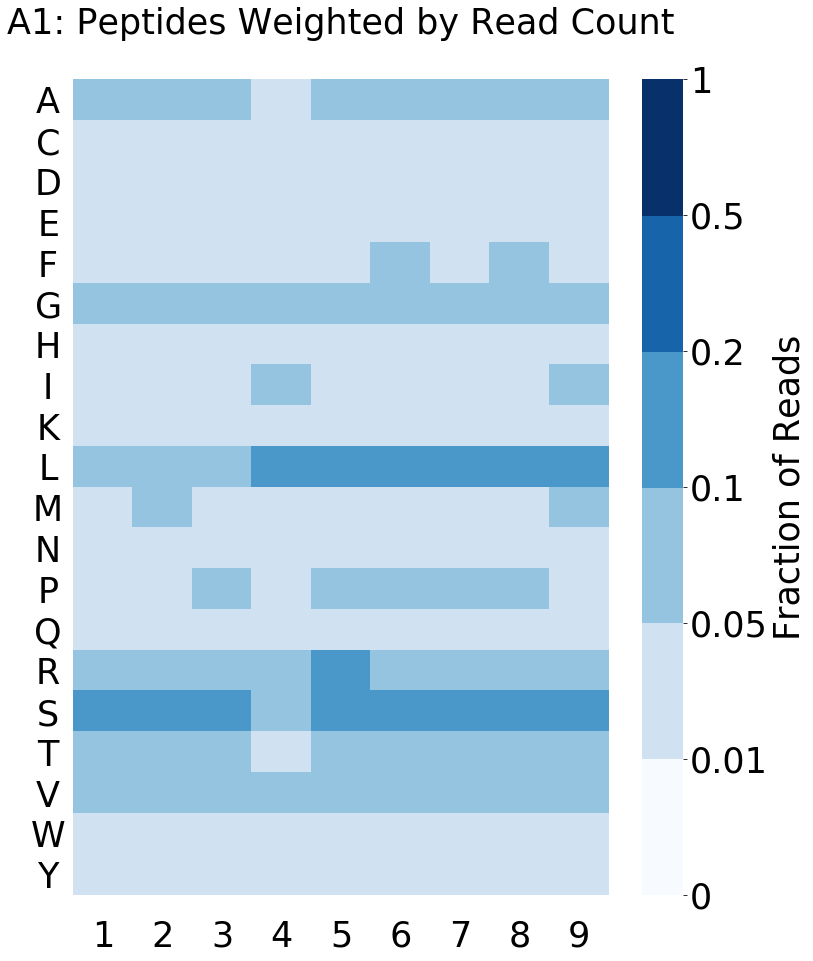

Analyzing round C1


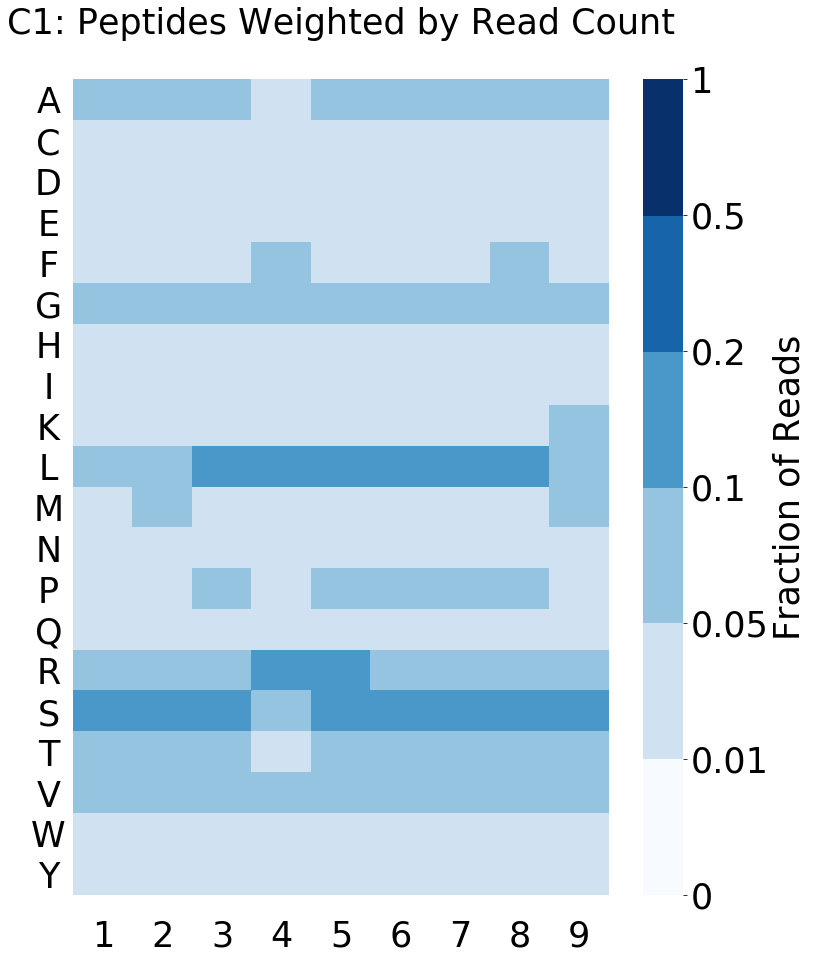

Analyzing round AA4


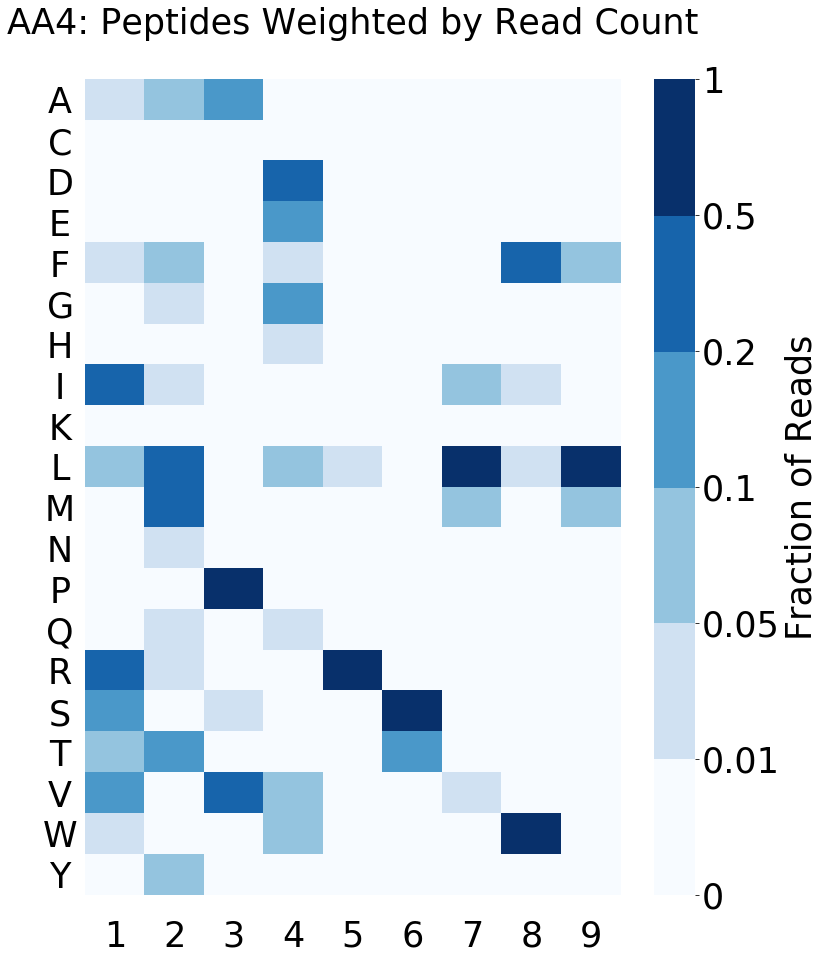

Analyzing round AC4


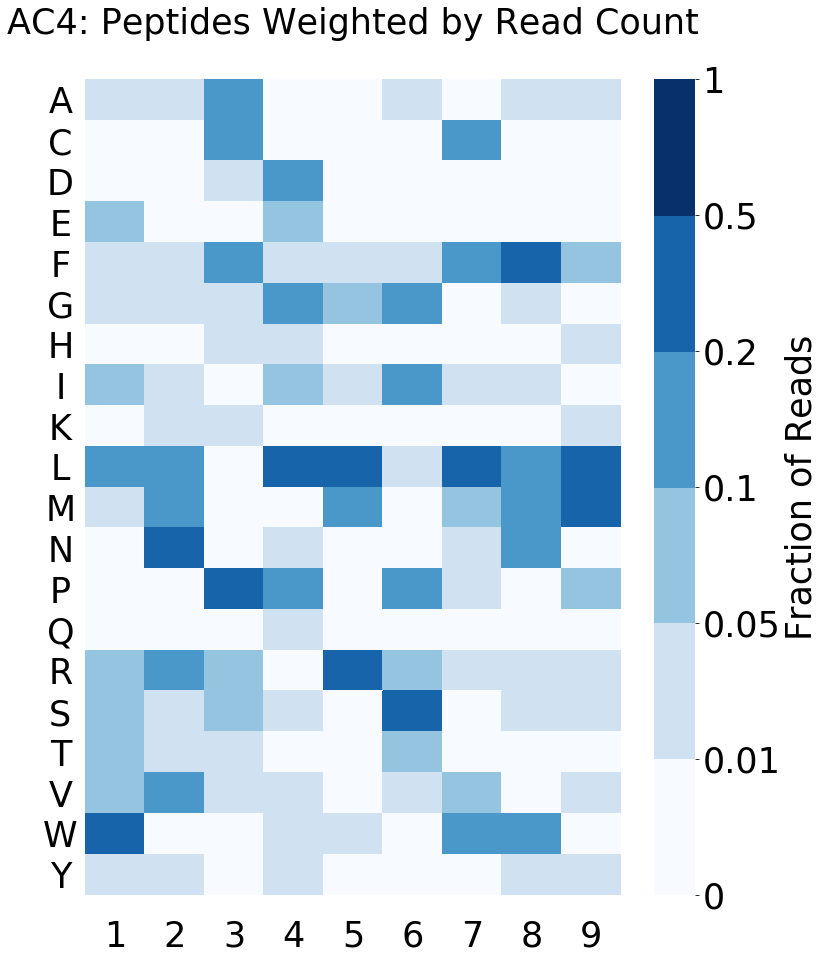

Analyzing round CA4


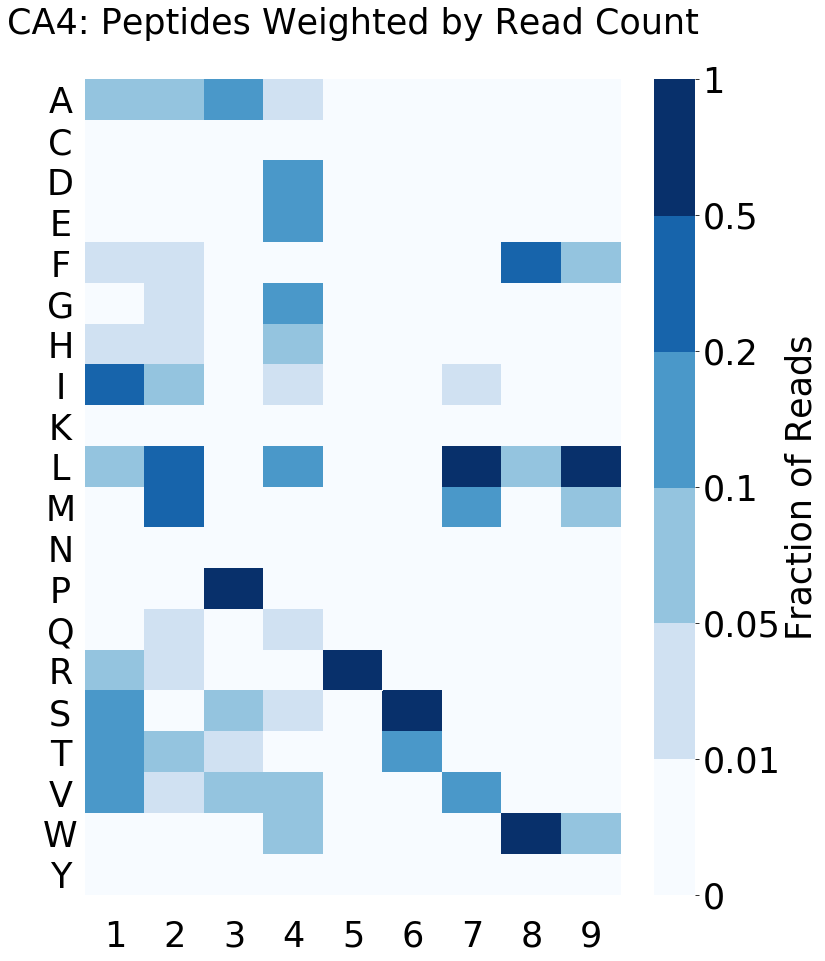

Analyzing round CC4


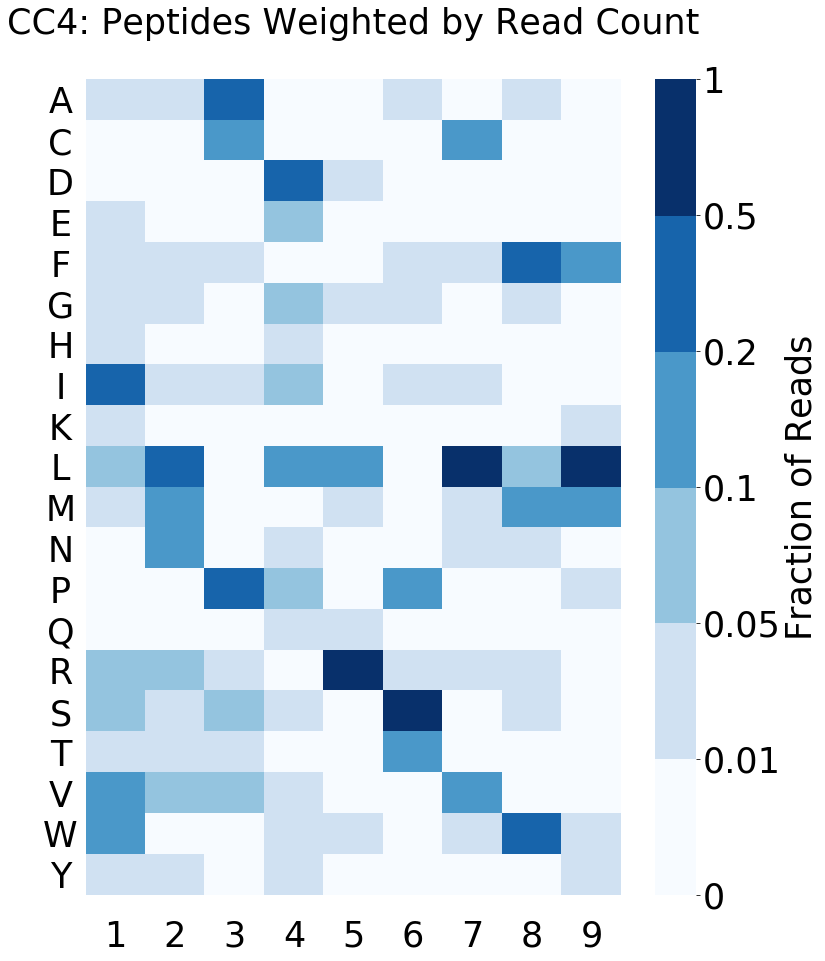

In [3]:
for roundx in ['A3','C3','R0','A2','C2','A1','C1','AA4','AC4','CA4','CC4']:
    print('Analyzing round', roundx)
    file_name = '3312{}_cdhit-corrected_data'.format(roundx)
    pivot=do_it(file_name,roundx)